# Keras model을 통해 y값 예측하기

In [30]:
# ### KNU 한국어 감성사전 -DI LAB
# - SentiWord info.json 한국어 감성사전 제공

import json
import pandas as pd
from tqdm import tqdm

In [31]:
import sqlite3

In [32]:
conn = sqlite3.connect("./drive/MyDrive/news.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [33]:
c.execute("SELECT body FROM newspapers") # newspaper text(기사)의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

print(articles[0])  # articles[i]가 text 등 모든 내용을 포함한 기사 1개

('서울 서초동에서 80대 남성이 운전하던 승용차가 미용실 안으로 돌진해 손님 1명이 사망하고 직원 1명이 크게 다치는 사고가 발생했다. \n \n 30일 경찰과 소방에 따르면 이날 오전 11시 25분쯤 A씨(82)가 운전하던 승용차가 골목길에 주차된 오토바이 3대와 1차로 추돌한 뒤 미용실 옆에 주차된 봉고차량 1대를 들이받고 미용실로 돌진했다. \n \n 이 ..',)


In [ ]:
articles[0]

In [ ]:
articles[0][0]  # title

In [ ]:
!python -m pip install konlpy

In [35]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  42915      0 --:--:-- --:--:-- --:--:-- 43282


In [36]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [37]:
from konlpy.tag import Mecab
mecab = Mecab()

In [117]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '사', '의', '위', '제', '회', '등', '가', '이', '했', '한', '에', '애', '하', '보', '웃', '고', '곧', '정', '적', '순', '뜻', '용', '열', '유', '뜻', '잘', '못', '타', '희', '히', '점', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '개', '대', '것', '명', '원', '세','에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', '|', '/','‘', '’', ',' , '“', '”', '.', '>', '<', ')', '(']

In [39]:
import re

In [46]:
def mec(i):
  words = list()
  for tok in articles[i]:
    temp = ''.join(tok)
    temp_re = re.sub('[^가-힣ㄱ-ㅎㅠ ]','', temp)
    encoded = mecab.morphs(temp_re)
    wd = [item for item in encoded if item not in stopwords]  # ('[^가-힣ㄱ-ㅎㅠ ]','')
    words.append(wd)

  return words

#### 사전에 단어 추가하는 부분(단어 추가하지 않을꺼면 필요없음)

In [41]:
SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장

In [42]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
# SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
# SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
# SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res


In [ ]:
for i in range(10,100):
  print(articles[i])

In [62]:
def judge(sum):
  if sum > 3:
      j = '긍정'
  elif sum < -5:
      j = '-부정'
  else:
      j = '중립'
  return j

In [ ]:
from tqdm import tqdm
from collections import Counter 

judge_list = []
for i in range(len(articles)):  # range는 len(articles) 
  article = mec(i)
  
  pos_list = []
  neg_list = []
  unkown_list = []    
  
  for noun in tqdm(article[0], '긍/부정 나누기'):

      word_res = pos_neg(noun)
      sum = len(pos_list) - len(neg_list) 

      if word_res[1] > 0:
          pos_list.append(word_res[0])
      elif word_res[1] < 0 :
          neg_list.append(word_res[0])
      else:
          unkown_list.append(word_res[0])
     
      jd = judge(sum)
    
  judge_list.append(jd)

print(judge_list)

In [94]:
df = pd.read_excel('./drive/MyDrive/j_press_combine.xls')

In [ ]:
from sklearn.model_selection import train_test_split

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   identical   7952 non-null   float64
 1   date        7952 non-null   int64  
 2   press       7952 non-null   object 
 3   name        6808 non-null   object 
 4   title       7952 non-null   object 
 5   c1          7952 non-null   object 
 6   c2          6447 non-null   object 
 7   c3          4869 non-null   object 
 8   a1          1417 non-null   object 
 9   a2          348 non-null    object 
 10  a3          96 non-null     object 
 11  person      6100 non-null   object 
 12  place       6979 non-null   object 
 13  institute   7841 non-null   object 
 14  keyword     7932 non-null   object 
 15  topkeyword  7932 non-null   object 
 16  body        7952 non-null   object 
 17  url         7952 non-null   object 
 18  d1          0 non-null      float64
 19  d2          7952 non-null  

In [97]:
x_data = df['body'] # 기사 전문
y_data = df['judge_num']  # 점수(긍정 단어수 - 부정 단어수)

In [98]:
type(x_data), type(y_data)

(pandas.core.series.Series, pandas.core.series.Series)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [100]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5964,), (5964,), (1988,), (1988,))

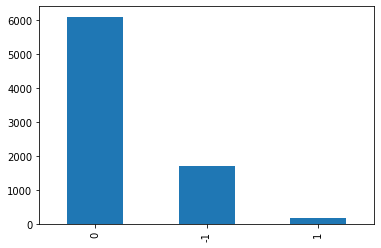

In [102]:
y_data.value_counts().plot(kind='bar')

In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]',' ')

In [105]:
x_train_small = x_train[0:2000]

In [128]:
sentence = list()

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])
print(sentence)

[['미국', '중국', '유럽', '반도체', '패권', '전쟁', '치열', '지만', '국내', '반도체', '업계', '좀처럼', '돌파구', '찾', '못하', '있', '조', '바이든', '미국', '대통령', '12', '일', '현지', '시간', '온라인', '진행', '반도체', '최고', '경영자', '서밋', '참석', '해', '삼성전자', '투자', '압박', '동맹', '내세워', '중국', '견제', '왕', '중국', '외교', '부장', '지난', '3', '일', '정의용', '외교부', '장관', '만나', '반도체', '포함', '첨단', '기술', '분야'], ['━', '"', '이스타', '수백', '억', '피해', '이상직', '일가', '귀속', '"', '이스타항공', '창업주', '이상직', '무소속', '의원', '58', '수백', '억', '삿', '돈', '빼돌려', '정치', '자금', '가족', '생활비', '사용', '혐의', '구속', '될', '상황', '처했', '검찰', '의원', '그', '일가', '횡령', '배임', '따른', '피해', '금액', '555', '억', '달하', '구속', '영장', '청구', '상태', '19', '일', '법원', '국회', '제출'], ['민주당', '2030', '남성', '표', '결집', '력', '과소평가', '여성주의', '운동', '만', '올인', '했으니', '이런', '결과', '나온', '국민', '힘', '이준석', '전', '최고', '위원', '말', '20', '남성', '으로부터', '72', '%', '가까운', '몰표', '받', '자', '잔뜩', '고무', '된', '모양', '그', '이대남', '20', '남성', '반여성주의', '편승', '해', '온', '전략', '주효', '결과', '푼다', '젠더', '반응', '대녀'], ['옷', '가게', '직원', '뺨', '때린', '혐의', '경찰', 

In [108]:
import tensorflow as tf

In [129]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.word_index

In [111]:
print(tokenizer.word_counts)

OrderedDict([('미국', 310), ('중국', 126), ('유럽', 41), ('반도체', 64), ('패권', 8), ('전쟁', 29), ('치열', 11), ('지만', 195), ('국내', 160), ('업계', 38), ('좀처럼', 6), ('돌파구', 3), ('찾', 53), ('못하', 23), ('있', 1060), ('조', 133), ('바이든', 57), ('대통령', 213), ('12', 153), ('일', 2129), ('현지', 217), ('시간', 250), ('온라인', 80), ('진행', 112), ('최고', 65), ('경영자', 11), ('서밋', 1), ('참석', 47), ('해', 571), ('삼성전자', 50), ('투자', 96), ('압박', 8), ('동맹', 9), ('내세워', 2), ('견제', 6), ('왕', 7), ('외교', 36), ('부장', 65), ('지난', 386), ('3', 406), ('정의용', 10), ('외교부', 23), ('장관', 123), ('만나', 40), ('포함', 55), ('첨단', 7), ('기술', 128), ('분야', 42), ('━', 148), ('"', 594), ('이스타', 3), ('수백', 7), ('억', 150), ('피해', 40), ('이상직', 8), ('일가', 4), ('귀속', 3), ('이스타항공', 5), ('창업주', 6), ('무소속', 8), ('의원', 303), ('58', 14), ('삿', 1), ('돈', 20), ('빼돌려', 1), ('정치', 57), ('자금', 22), ('가족', 46), ('생활비', 1), ('사용', 57), ('혐의', 193), ('구속', 63), ('될', 82), ('상황', 57), ('처했', 3), ('검찰', 89), ('그', 193), ('횡령', 12), ('배임', 8), ('따른', 19), ('금액', 18), ('555'

In [131]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [132]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(15551, 9685, 62.27895312198572, 10.540341376473814)

In [133]:
vocab_size = total_cnt - rare_cnt
vocab_size

5866

In [134]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [135]:
print(tokenizer.word_index)

{'OOV': 1, '일': 2, '있': 3, '1': 4, '코로나': 5, '년': 6, "'": 7, '"': 8, '해': 9, '만': 10, '19': 11, '면': 12, '2': 13, '서울': 14, '전': 15, '기': 16, '4': 17, '월': 18, '어': 19, '3': 20, '밝혔': 21, '지난': 22, '된': 23, '받': 24, '씨': 25, '며': 26, '한국': 27, '수': 28, '시장': 29, '됐': 30, '중': 31, '자': 32, '5': 33, '던': 34, '이날': 35, '따르': 36, '백신': 37, '미국': 38, '7': 39, '의원': 40, '할': 41, '되': 42, '국민': 43, '시': 44, '에게': 45, '정부': 46, '6': 47, 'a': 48, '까지': 49, '시간': 50, '바이러스': 51, '말': 52, '현지': 53, '20': 54, '대통령': 55, '않': 56, '대표': 57, '후보': 58, '10': 59, '신종': 60, '감염증': 61, '8': 62, '민주당': 63, '다는': 64, '지만': 65, '없': 66, '대한': 67, '혐의': 68, '그': 69, '아': 70, '오': 71, '차': 72, '겠': 73, '접종': 74, '%': 75, '지난해': 76, '주': 77, '선거': 78, '관련': 79, '힘': 80, '경찰': 81, '조사': 82, '-': 83, '9': 84, '화': 85, '30': 86, '성': 87, '국내': 88, '21': 89, '두': 90, '지역': 91, '오전': 92, '12': 93, '억': 94, '대해': 95, '━': 96, '더불': 97, '위해': 98, '나': 99, '오후': 100, '결과': 101, '여': 102, '분': 103, '통해': 104, '열린': 105

In [136]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [137]:
print(x_train_small[0:2])

[[38, 123, 462, 270, 2210, 675, 1692, 65, 88, 270, 506, 2787, 4565, 347, 833, 3, 116, 316, 38, 55, 93, 2, 53, 50, 214, 141, 270, 265, 1693, 1, 395, 9, 370, 174, 2211, 2004, 1, 123, 2788, 2464, 123, 534, 266, 22, 20, 2, 1832, 834, 127, 482, 270, 330, 2465, 120, 451], [96, 8, 4566, 2466, 94, 483, 2212, 3776, 4567, 8, 3204, 2789, 2212, 2213, 40, 1384, 2466, 94, 1, 976, 1, 317, 882, 404, 1, 318, 68, 275, 204, 319, 4568, 187, 40, 69, 3776, 1572, 2214, 1021, 483, 1078, 3777, 94, 3778, 275, 809, 1022, 535, 11, 2, 405, 175, 723]]


평균 length

In [138]:
hist_len = [len(words) for words in x_train_small]

(array([  2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   2.,
          0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,
          2.,   2.,   2.,   1.,   4.,   3.,   3.,   9.,  18.,  28.,  57.,
        141., 112., 272., 156., 165., 343., 126., 232.,  99., 118.,  28.,
         22.,  34.,   5.,   3.,   0.,   2.]),
 array([ 5.  ,  6.42,  7.84,  9.26, 10.68, 12.1 , 13.52, 14.94, 16.36,
        17.78, 19.2 , 20.62, 22.04, 23.46, 24.88, 26.3 , 27.72, 29.14,
        30.56, 31.98, 33.4 , 34.82, 36.24, 37.66, 39.08, 40.5 , 41.92,
        43.34, 44.76, 46.18, 47.6 , 49.02, 50.44, 51.86, 53.28, 54.7 ,
        56.12, 57.54, 58.96, 60.38, 61.8 , 63.22, 64.64, 66.06, 67.48,
        68.9 , 70.32, 71.74, 73.16, 74.58, 76.  ]),
 <a list of 50 Patch objects>)

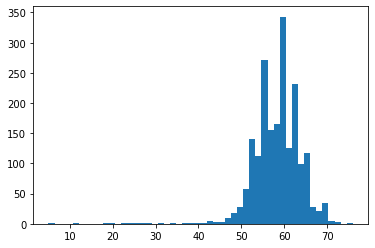

In [139]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins = 50)

In [141]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [142]:
y_train_small = y_train[0:2000]

In [146]:
import numpy as np

In [149]:
y_train_small = np.array(y_train_small)+1
np.unique(y_train_small)

array([0, 1, 2])

In [150]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
# model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer, Bidrectional 양쪽으로 학습
# model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(3, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['acc']) # gadget

In [151]:
hist = model.fit(x_train_small, y_train_small, epochs=10, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/10
6/6 [==============================] - 7s 633ms/step - loss: 1.0607 - acc: 0.6793 - val_loss: 0.9585 - val_acc: 0.7467
Epoch 2/10
6/6 [==============================] - 3s 481ms/step - loss: 0.7935 - acc: 0.7571 - val_loss: 0.6657 - val_acc: 0.7467
Epoch 3/10
6/6 [==============================] - 3s 477ms/step - loss: 0.6334 - acc: 0.7571 - val_loss: 0.6458 - val_acc: 0.7467
Epoch 4/10
6/6 [==============================] - 3s 475ms/step - loss: 0.6030 - acc: 0.7571 - val_loss: 0.6528 - val_acc: 0.7467
Epoch 5/10
6/6 [==============================] - 3s 474ms/step - loss: 0.5869 - acc: 0.7571 - val_loss: 0.6322 - val_acc: 0.7467
Epoch 6/10
6/6 [==============================] - 3s 485ms/step - loss: 0.5648 - acc: 0.7571 - val_loss: 0.6307 - val_acc: 0.7467
Epoch 7/10
6/6 [==============================] - 3s 476ms/step - loss: 0.5353 - acc: 0.7571 - val_loss: 0.6097 - val_acc: 0.7467
Epoch 8/10
6/6 [==============================] - 3s 469ms/step - loss: 0.4845 - acc: 0.75